<a href="https://colab.research.google.com/github/purvadanait/AIML-Pract/blob/main/LASSO%20vs%20Ridge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

from sklearn import datasets

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix, classification_report, log_loss, roc_curve, roc_auc_score

In [3]:
data = datasets.load_breast_cancer()
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['target']=data.target

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
X_train, X_test, y_train, y_test = train_test_split(df[df.columns.difference(['target'])], df['target'], test_size=0.2, random_state=42)

print(f'The training dataset has {len(X_train)} records.')
print(f'The testing dataset has {len(X_test)} records.')

The training dataset has 455 records.
The testing dataset has 114 records.


In [5]:
# Initiate scaler
sc = StandardScaler()
# Standardize the training dataset
X_train_transformed = pd.DataFrame(sc.fit_transform(X_train),index=X_train.index, columns=X_train.columns)
# Standardized the testing dataset
X_test_transformed = pd.DataFrame(sc.transform(X_test),index=X_test.index, columns=X_test.columns)
# Summary statistics after standardization
X_train_transformed.describe().T

,count,mean,std,min,25%,50%,75%,max
area error,455.0,6.246530e-17,1.001101,-0.705091,-0.464164,-0.325347,0.077435,10.641841
compactness error,455.0,-2.395154e-15,1.001101,-1.258102,-0.694353,-0.280607,0.358304,5.905671
concave points error,455.0,3.455112e-16,1.001101,-1.891775,-0.668493,-0.126279,0.437566,6.504667
concavity error,455.0,2.479091e-16,1.001101,-1.022218,-0.551340,-0.207836,0.303371,11.310294
fractal dimension error,455.0,5.085065e-16,1.001101,-1.050856,-0.573964,-0.218908,0.245340,9.345870
mean area,455.0,-2.537653e-16,1.001101,-1.365036,-0.660205,-0.289597,0.319339,5.208312
mean compactness,455.0,1.011157e-15,1.001101,-1.607228,-0.777087,-0.241340,0.528128,3.964311
mean concave points,455.0,5.817081e-16,1.001101,-1.269910,-0.734905,-0.391123,0.673757,4.022271
mean concavity,455.0,9.857804e-16,1.001101,-1.119899,-0.750539,-0.344646,0.547387,4.256736
mean fractal dimension,455.0,-3.367270e-15,1.001101,-1.776889,-0.709792,-0.177285,0.464223,4.815921


In [6]:
LogisticRegression()
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression()

In [7]:
# Run model
logistic = LogisticRegression(penalty='none', random_state=0).fit(X_train_transformed, y_train)
# Make prediction
logistic_prediction = logistic.predict(X_test_transformed)
# Get predicted probability
logistic_pred_Prob = logistic.predict_proba(X_test_transformed)[:,1]

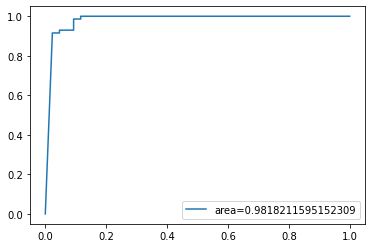

In [8]:
# Get the false positive rate and true positive rate
fpr,tpr, _=roc_curve(y_test,logistic_pred_Prob)
# Get auc value
auc=roc_auc_score(y_test,logistic_pred_Prob)
# Plot the chart
plt.plot(fpr,tpr,label="area="+str(auc))
plt.legend(loc=4)

              precision    recall  f1-score   support

           0      0.875     0.977     0.923        43
           1      0.985     0.915     0.949        71

    accuracy                          0.939       114
   macro avg      0.930     0.946     0.936       114
weighted avg      0.943     0.939     0.939       114



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


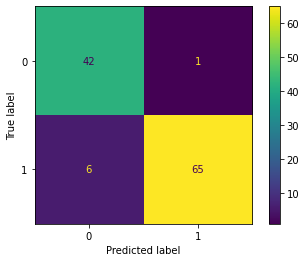

In [9]:
plot_confusion_matrix(logistic, X_test_transformed, y_test)
print(classification_report(y_test, logistic_prediction, digits=3))

In [10]:
lasso = LogisticRegression(penalty='l1', solver='liblinear', 
                           random_state=0).fit(X_train_transformed, y_train)
#penalty='l1' stands for lasso

lasso_prediction = lasso.predict(X_test_transformed)
lasso_pred_Prob = lasso.predict_proba(X_test_transformed)[:,1]

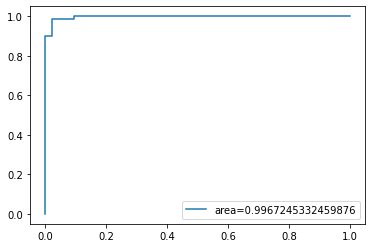

In [11]:
# Get the false positive rate and true positive rate
fpr,tpr, _= roc_curve(y_test,lasso_pred_Prob)
# Get auc value
auc = roc_auc_score(y_test,lasso_pred_Prob)
# Plot the chart
plt.plot(fpr,tpr,label="area="+str(auc))
plt.legend(loc=4)

In [12]:
# Calculate log loss
log_loss(y_test,lasso_pred_Prob)
0.06846705785516008

0.06846705785516008

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0      0.955     0.977     0.966        43
           1      0.986     0.972     0.979        71

    accuracy                          0.974       114
   macro avg      0.970     0.974     0.972       114
weighted avg      0.974     0.974     0.974       114



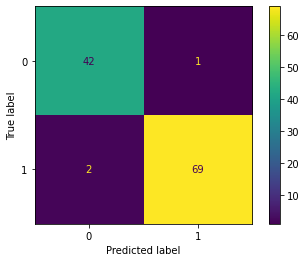

In [14]:
plot_confusion_matrix(lasso, X_test_transformed, y_test)
print(classification_report(y_test, lasso_prediction, digits=3))

In [15]:
# Model coefficients
lassoCoeff = pd.concat([pd.DataFrame(X_test_transformed.columns),
                       pd.DataFrame(np.transpose(lasso.coef_))], axis = 1)
lassoCoeff.columns=['Variable','Coefficient']
lassoCoeff['Coefficient_Abs']=lassoCoeff['Coefficient'].apply(abs)
lassoCoeff.sort_values(by='Coefficient_Abs', ascending=False)

,Variable,Coefficient,Coefficient_Abs
20,worst area,-3.140509,3.140509
16,radius error,-2.468108,2.468108
7,mean concave points,-2.438759,2.438759
29,worst texture,-1.853566,1.853566
23,worst concavity,-1.296364,1.296364
28,worst symmetry,-1.033836,1.033836
1,compactness error,0.890522,0.890522
26,worst radius,-0.749851,0.749851
18,symmetry error,0.462483,0.462483
17,smoothness error,-0.433176,0.433176
